[Paper] : https://www.semanticscholar.org/paper/A-Control-Systems-based-Look-at-Financial-Primbs/ceda761c11cee541e76776fe4837642d5d0a09e1

# Notation

$a_i$ - number of shares or units of asset i  
$E[\cdot]$ - expectation  
$\eta$ - vector of excess returns $\left(\mu-r_{f}\bf1\right)$  
$\gamma$ - relative risk aversion coefficient  
$\mu_{i}$ - drift of stock i  
$N(\mu,\sigma)$ - a normally distributed random variable with mean $\mu$ and variance $\sigma^2$  
$\mathcal{N}(\cdot)$ - cumulative distribution function of a $N(0,1)$ random variable  
$r_f$ - risk free rate of interest  
$S_{i}(t)$ - price per share of stock i  
$\sigma_i$ - 1 x $m$ vector of coefficient of corresponding to $Z(t)$ in the model for the return of a stock  
$\Sigma$ - covariance matrix of returns of stocks  
$t$ - time  
$u_i$ - dollar amount held of asset $i$  
$V$ - Value function in dynamic programming  
$w_i$ - porfolio weights  
$W(t)$ - wealth  
$Z(t)$ - standard Brownian Motion


# Modeling of Asset Price Dynamics

## Modeling the Dynamics of a Stock

주식의 수익률이 정규분포를 따른다는 가정부터 시작  
(실제론 평상시엔 leptokurtic 형태에 가깝고, rare event가 터지는 상황은 levy 분포로 보통 모델링)

$$r(t) = \frac{S(t+\Delta t)-S(t)}{S(t)} \sim N(\mu\Delta t, \sigma^2\Delta t) \label{eq1}\tag{1}$$
$$r(t) = \frac{S(t+\Delta t)-S(t)}{S(t)}= \mu\Delta t+ \sigma\epsilon(\Delta t) \label{eq2}\tag{2}$$
, where $\epsilon(\Delta t) \sim N(0,\Delta t)$, $\mu$ is a drift, $\sigma$ is a volatility  
(2)식에서 $\Delta t \to 0$,으로 하면, 식 (3)의 SDE가 도출됨

## A continuous time limit

$$dS(t) = \mu S(t)dt + \sigma SdZ(t)  \label{eq3}\tag{3}$$  
,where $Z(t)$ 는 standard brownian motion이고, $dZ \to N(0,dt).$  
식 (3)은 standard brownian motion으로 finance의 연속시간모델링에서 가장 많이 사용됨

Ito's lemma를 통해서 식(3)은 다음과 같은 log꼴로 표현 가능하고,
$$d(ln S) = \left(\mu-\frac{1}{2}\sigma^2\right)dt + \sigma dZ \label{eq4}\tag{4}$$

위의 solution을 구하면 다음과 같은 시간관계 식이 됨  
$$S(t) = S(0)e^{\left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma Z(t)} \label{eq5} \tag{5}$$

## Modeling Multiple Stocks

여러 주식들의 가격은 대체로 $correlated$ geometric Brownian motions로 모델링된다.  
즉 n번째 주식 가격을 $S_i(t)$ for $i = 1, \cdots, n$으로 표현하면,

$$\frac{dS_i}{S_i}=\mu_i dt + \sigma_i dZ(t) \label{eq6} \tag{6}$$  
where $Z(t) \in \mathbf{R}^m $은 standard $vector$ Brownian motion들이고 $\sigma_i \in \mathbf{R}^{1\times m}$이다.  
  
이 경우엔 $dZ \sim N(0, Idt)$, where $I$는 $n \times n$의 항등행렬이 되고, 그러므로 vector Brownian motion의 $Z_j, j=1...m$ element들은 $uncorrelated$되어 있다고 가정한다

주식들의 수익률은 다음의 vector로 관리할 수 있고 $\mathbf r = \left[\frac{dS_1}{S_1},\cdots,\frac{dS_n}{S_n}\right]^T$, 그러면 (6)식을 다음과 같이 간결하게 쓸 수 있다.

$$ \mathbf{r} = \boldsymbol{\mu}dt + \boldsymbol{\sigma}dZ \label{eq7} \tag{7}$$  
,where  
$$\boldsymbol{\mu} = 
\begin{bmatrix}
\mu_1 \\
\vdots \\
\mu_n 
\end{bmatrix}
,
\boldsymbol{\sigma} = 
\begin{bmatrix}
\sigma_{1}\\
\vdots\\
\sigma_{n}\\
\end{bmatrix}
\label{eq8} \tag{8}
$$

부가적으로 다음을 정의하면,
$$\Sigma = \boldsymbol{\sigma\sigma^T} \label{eq9} \tag{9}$$  
$\Sigma dt$는 즉각적인 주식 수익률 vector의 covariance matrix가 된다.

## A Risk Free Asset

finance에서 채권이나 현금 같은 risk free 자산에 다음의 수익률을 가정하는 건 매우 일반적이다.  

$$dB = B\space r_f dt \label{eq10} \tag{10}$$  
  
여기에 양변을 dt로 나누어 solution을 구하면 다음과 같이 된다.  

$$B(t) = B(0)e^{r_{f}t} \label{eq11} \tag{11}$$    
그러나 위의 SDE notation과의 일관성을 위해 (10)처럼 쓰도록 한다.

# Modeling Wealth Dynamics

## Denominating a portfolio via weights

$W(t)$를 우리가 가진 위험자산과 무위험 자산으로 구성된 포트폴리오의 가치(부)로 정의하면, 다음과 같이 그 자산에 투자된 가치(부)의 조각에 의해 각 자산에 대한 지분을 기술할 수 있다.

$$\frac{dW}{W} = \left(1- \sum_{i=1}^{n}{w_i}\right)\frac{dB}{B}+\sum_{i=1}^{n}{\left(w_i \frac{dS_i}{S_i}\right)} \label{eq12} \tag{12}$$

$dB$에 (11)을, $dS$에 (6)을 대입하면 다음과 같은 포트폴리오 가치의 dynamics가 나오게 된다.

$$	
\begin{align}
\frac{dW}{W} & = r_f dt+ \sum_{i=1}^{n}{w_i\left[\left(\mu_i - r_f\right)dt + \sigma_i dZ\right]} \label{eq13} \tag{13} \\
& = \left[r_f + \mathbf{w}^T(\boldsymbol{\mu}-r_f \mathbf{1}) \right]dt + \mathbf{w}^T \boldsymbol{\sigma} dZ \\
\end{align}$$

,where $\mathbf{w}$ : (n,1), $\mathbf{1} : (n, 1)$  

여기서 앞으로 자주 쓰게될 $(\boldsymbol{\mu}-r_f \mathbf{1})$ 부분을 $\boldsymbol{\eta}$로 치환하면 다음과 같다.

$$\frac{dW}{W} = \left[r_f + \mathbf{w}^T\boldsymbol{\eta} \right]dt + \mathbf{w}^T \boldsymbol{\sigma} dZ \label{eq14} \tag{14}$$

포트폴리오의 지분을 기술할 때 포트폴리오 (12)식 처럼 weight $w_i$를 사용하는 것은 매우 편리하다. 그러나 이 지분을 표기할 때 아래와 같이, 해당 위험 자산을 몇 주 단위로 갖고 있는지(3.2)나 실제 현금 단위로 표기할 수도 있을 것이다.

$ Ww_i = \alpha_i S_i = u_i $

## Denominating a porfolio in shares

$$ \begin{align}
dW & = r_f W dt+ \sum_{i=1}^{n}{\alpha_i S_i\left[\left(\mu_i - r_f\right)dt + \sigma_i dZ\right]} \label{eq15} \tag{15}  \\
& =  r_f W dt+ \sum_{i=1}^{n}{\alpha_i S_i\left[\eta_i dt + \sigma_i dZ\right]} \label{eq16} \tag{16}
\end{align}
$$

, where $\alpha$는 위험자산의 지분(단위 : 주)를 의미하고 S는 위험자산의 가격을 나타낸다. 

## Denominating a portfolio in dollars

$$ \begin{align}
dW & = r_f W dt+ \sum_{i=1}^{n}{u_i\left[\left(\mu_i - r_f\right)dt + \sigma_i dZ\right]} \label{eq17} \tag{17}  \\
& =  r_f W dt+ \sum_{i=1}^{n}{u_i\left[\eta_i dt + \sigma_i dZ\right]} \label{eq18} \tag{18}
\end{align}
$$

, where $u_i$는 포트폴리오에서 해당 자산에 대한 현금 지분을 나타낸다.

# Options and hedging

 이 section에서는 무배당 주식에 대한 European call option의 고전 Black-Scholes option pricing equation을 도출할 것이다. 기본적인 아이디어는 기초자산과 무위험자산으로 구성된 포트폴리오를 만들어, 만기 때의 옵션 가치를 복제하는 것이다. 투자자의 관점에선 실제 옵션을 들고 있거나, 옵션을 복제하는 포트폴리오를 들고 있는 것에는 관심이 없을 수 있다.  
 이렇게 복제 포트폴리오(replicating portfolio)를 만드는 것을 동적헷징(dynamic hedging)이라고도 한다. 이를 하는 이유는, 예컨대 옵션 매도자의 경우 복제 포트폴리오를 만듦으로써 매도한 옵션에 대한 위험을 헷지할 수 있기 때문이다. 

## The Payoff Structure of a European Call Option

Long position payoff of European call option
$$c(S,T) = (S-K)^+$$

## The Classical Option Pricing Model of Black and Scholes

Option pricing equation을 도출하기 위해, Geometric Brownian Motion을 따르는 기초자산과 무위험자산으로 구성된 포트폴리오를 European Call의 만기시점 payoff와 "최대한 가깝게" 운용하는 Objective의 Control problem을 formulating해보자.

$$\min_{\alpha}{E\left[\left(W(T)-f(S(T),T) \right)^2\right]} \label{eq19} \tag{19}$$
,where $f(S(T),T) = (S(T)-K)^+ $  
  
$\text{s.t.}$


$$dW = r_f W dt+ \alpha S\left(\left(\mu - r_f\right)dt + \sigma dZ\right) \label{eq20} \tag{20} $$
$$dS = \mu S dt + \sigma S dZ \label{21} \tag{21}$$

포트폴리오 가치의 dynamics ($dW$)를 3.2의 (15)형태로 표현함

Dynamic Programming을 통한 solution이 Initial condition(즉, 포트폴리오의 Initial Wealth)을 가장 잘 복제하기 위해 어떤 것이어야 하는지를 암시할 것이기 때문에 Initial condition을 지정하는 것에 대해 의도적으로 모호하게 표현했다.  
이러한 최적의 initial Wealth은 옵션의 공정가치(fair value)로 작용하며 블랙-숄즈 가격에 해당한다.

### Solution via the HJB equation

Dynamic programming을 이용해 이 problem을 위한 HJB eqn은 다음과 같이 쓸 수 있다.  

$$0 = \min_{\alpha}{\left( V_t + V_S \mu S +V_W(r_f W + \alpha S(\mu-r_f)) + V_{SS}\frac{1}{2}\sigma^2 S^2 + V_{SW}\sigma^2 S^2 \alpha + V_{WW}\frac{1}{2}\alpha^2 S^2 \sigma^2 \right)} \label{22} \tag{22}$$

(19)가 $W(t)$로 구성된 linear quadratic structure의 problem이므로, HJB eqn을 풀기 위해 다음 형태의 solution을 갖는다고 추측할 수 있다.  

$$V(t, W, S) = a(t,S)(W(t) - b(t,S))^2 + c(t,S) \label{23} \tag{23}$$

이 문제는 min에 대한 문제이기 때문에 Value function은 "손실"로 해석해야 한다.
$W(t)$가 포트폴리오 Wealth에 대한 함수이므로, $b(t,S)$는 해당 value function을 최소화하는 $W(t)$의 값이다.  
따라서 최선의 복제를 위해 복제 포트폴리오의 초기 자산을 선택할 수 있다면(즉, 이 선택으로 인해 가장 작은 value function이 나오므로 가장 좋은 복제) $W(0) = b(0, S)$를 선택해야 한다. 그래서 $b(t, S)$는 자연스레 옵션의 '공정 가격(fair price)'으로 해석된다.

$c(t, S)$는 value function의 최소값이며, 따라서 expected quadratic cost에 따라 옵션을 실제로 복제하는 데 얼마나 근접할 수 있는지를 알려준다.  

마지막으로 $a(t, S)$는 $b(t, S)$의 '공정 가격'과 같은 포트폴리오 Wealth를 갖지 못할 경우 value function(따라서 복제 오류)이 얼마나 빨리 커지는지를 나타낸다.

(23)의 value function을 HJB eqn(22)에 대입하면,

$0  = \min_{\alpha}{\Big[a_t(W-b)^2 - ab_t(W-b) + c_t + \mu S(a_S (W-b)^2 - 2ab_S (W-b) + c_S)}$  
$\quad\quad\quad\space + 2a(W-b)(r_f (W-b) + r_f b + \alpha S(\mu - r_f)$  
$\quad\quad\quad\space + \frac{1}{2} \sigma^2 S^2 (a_{SS}(W-b)^2 - 2(2a_S b_S + ab_{SS})(W-b) + 2ab_{S}^{2} + c_{SS})$  
$\quad\quad\quad\space + \alpha\sigma^2 S^2 (2a_S (W-b) - 2ab_S) + \alpha^2 \frac{1}{2}\sigma^2 S^2 (2a)\Big]$

$$ =  \min_{\alpha}{ 
\begin{Bmatrix}
\begin{bmatrix}
1 &
W-b &
\alpha
\end{bmatrix}
&
\begin{bmatrix}
P_{11} & P_{12} & P_{13} \\
P_{21} & P_{22} & P_{23} \\
P_{31} & P_{32} & P_{33}
\end{bmatrix}
&
\begin{bmatrix}
1 \\
W-b \\
\alpha
\end{bmatrix}
&
\end{Bmatrix}
\label{eq24} \tag{24}
}$$

,where  
$P_{11} = \left(c_t + \mu S c_S + \frac{1}{2} \sigma^2 S^2 (2ab_{S}^{2} + c_{SS})\right)$  
$P_{12} = \left( abr_f - ab_t - \mu S ab_S - \sigma^2 S^2 (a_S b_S + \frac{1}{2}ab_{SS})\right)$  
$P_{13} = -\sigma^2 S^2 ab_S$  
$P_{22} = \left( a_t + \mu Sa_S + 2ar_f + \frac{1}{2}\sigma^2 S^2 a_{SS} \right)$  
$P_{23} = \left[ a(S(\mu-r_f)) + \sigma^2 S^2 a_S \right]$  
$P_{33} = \sigma^2 S^2 a$  

(24)를 $\alpha$에 대해 미분하고 풀면, 
$$
\begin{align}
\alpha^* & = -P_{33}^{-1}
\begin{bmatrix}
P_{13}^{T} & P_{23}^{T}
\end{bmatrix}
\begin{bmatrix}
1 \\ W-b
\end{bmatrix}
\\
& = b_S - \left( \frac{(\mu-r_f)}{\sigma^2 S} + \frac{a_S}{a} \right) (W-b)
\\
\end{align}
\label{eq25} \tag{25}
$$

이 optimal strategy $a^*$를 다시 HJB (24)에 대입하면 아래와 같다.  

$$
\begin{align}
0 & = \begin{bmatrix} 1 & W-b \end{bmatrix}
\left\{ 
\begin{bmatrix} P_{11} & P_{12}\\ * & P_{22} \end{bmatrix}
-
\begin{bmatrix} P_{13} \\ P_{23}\end{bmatrix} P_{33}^{-1} \begin{bmatrix} P_{13}^T & P_{23}^T\end{bmatrix}
\right\}
\begin{bmatrix} 1 \\ W-b\end{bmatrix}
\\
& = \begin{bmatrix} 1 & W-b \end{bmatrix}
\begin{bmatrix} 
P_{11}-P_{13}P_{33}^{-1} P_{13}^T & P_{12}-P_{13}P_{33}^{-1} P_{23}^T \\
* & P_{22}-P_{23}P_{33}^{-1} P_{23}^T
\end{bmatrix}
\begin{bmatrix} 1 \\ W-b\end{bmatrix}
\\
\end{align}
\label{eq26}
\tag{26}
$$

위 행렬의 모든 element는 0 이어야 하므로 (26) 가운데 행렬의 (1,1), (1,2), (2,2) elements의 equation들은 다음과 같다.  

$$ 0 = c_t + \mu S c_S + \frac{1}{2}\sigma^2 S^2 c_{SS} \label{eq28} \tag{28} $$
$$ 0 = br_f - b_t - r_f Sb_S - \frac{1}{2}\sigma^2 S^2 b_{SS} \label{eq29} \tag{29}$$
$$ 0 = (a_t - \mu S a_S + 2r_f Sa_S + 2ar_f + \frac{1}{2}\sigma^2 S^2 a_{SS}) - \frac{(a(\mu - r_f)^2)}{\sigma^2}-\frac{\sigma^2 S^2 a_{S}^{2}}{a} \label{eq30} \tag{30}$$

$s.t.$ 경계조건들 : $c(T,S)=0,\quad b(T,S) = f(T,S),\quad a(T,S) = 1$

## The Black-Scholes option pricing equation

$b(t,S)$의 해석을 옵션의 "공정가격"이라고 했던 것을 상기시켜보면, $b(0,S)$는 optimal strategy 하에서 가장 payoff를 잘 복제한 결과이다. (29)로부터 우리는 다음을 따르는 공정가격을 이끌어낼 수 있다.

$$b_t + r_f S b_S + \frac{1}{2}\sigma^2 S^2 b_{SS} = r_f b \label{31} \tag{31}$$

s.t. 경계조건 $b(T,S) = f(T,S)$

(31)이 바로 그 Black-Scholes eqn이 된다. $\left(\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r_f S \frac{\partial V}{\partial S}-r_f V = 0\right)$

만약 payoff function $f(T,S)$이 European call option이면 (즉 $f(T,S) = (S-K)^+$), 다음과 같은 closed form solution이 존재하게 된다.

$$b(t,S) = S \mathcal N(d_1) - K e^{r_f(T-t)} \mathcal N(d_2) \label{eq32} \tag{32}$$  

$$d_1 = \frac{ln(\frac{S}{K}) + (r+\frac{1}{2} \sigma^2)(T-t)}{\sigma \sqrt{T-t}}, \quad d_2 = d_1 - \sigma \sqrt{T-t} $$

, where $\mathcal{N}(\cdot)$은 표준정규분포의 CDF이고 위의 (32)를 Black-Scholes formula라고 한다.  
  
Black-Scholes equation을 이끌어 내는 다양한 방법들이 있지만, 위의 방법은 고전적인 방법이 아니라서 아마 이러한 도출은 처음 접하리라 생각된다. 이 도출의 접근방식은 Option Pricing과 Control의 연결을 강조해서 보여주는 의의가 있다.

### Perfect Replication and the Optimal Control Strategy

이제 (28)에 대해 살펴보자.
$$c_t + \mu S c_S + \frac{1}{2}\sigma^2 S^2 (c_{SS}) = 0$$

c의 말기조건은 0이므로, solution은 모든 t와 S에 대해 $c(t,S) = 0$이 된다.  

이 결과는 만약 $b(t,S)$와 똑같은 wealth로 시작해 optimal strategy(25)에 따라 거래한다면 우리가 완벽히 option의 payoff를 에러없이 완벽히 복제할 수 있다는 것을 의미한다. 즉 value function은 $V(t, S, b(t,S)=0$이 된다.

optimal strategy $\left( \alpha^*= b_S - \left( \frac{(\mu-r_f)}{\sigma^2 S} + \frac{a_S}{a} \right) (W-b)\right)$(25)에 대해 생각해보자. 만약 우리가 초기 자본(initial wealth)을 $W(0) = b(0,S)$와 같이 시작한다면, 우리는 완벽한 복제를 할 수 있게 된다. 이는 우리가 모든 t에 대해 $W(t) = b(t, S(t)$를 갖는 것을 의미한다. 그래서 optimal strategy는 다음과 같이 축소된다.  

$$\alpha^* = b_S \label{eq33} \tag{33}$$

이 거래 전략을 $delta \space hedge$라고 하고, 우변을 option의 $delta$라고 한다. 다음 섹션을 통해 이 델타헷징 전략의 수치적 예제를 살펴보자.

## Numerical Simulation of the Delta Hedging Strategy

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [8]:
total_date = 84
S = np.zeros((total_date+1, 1)) # 주가벡터 생성(781,1)
delta= np.zeros((total_date+1, 1))
C= np.zeros((total_date+1, 1))
b= np.zeros((total_date+1, 1))
W= np.zeros((total_date+1, 1))

S[0] = 1
r = 0.05 # risk free rate
mu = 0.15
sigma = 0.2
K = 1


dt = 1/252

In [9]:
def call_price(S, K, ttm, r, sigma):    
    d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    d2 = ( np.log(S / K) + (r - sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    val = ( S * stats.norm.cdf(d1, 0.0, 1.0) ) - K * np.exp( -r * ttm ) * stats.norm.cdf(d2, 0.0, 1.0)
    return val

def call_delta(S, K, ttm, r, sigma):
    d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    val = stats.norm.cdf(d1, 0.0, 1.0)
    return val

In [4]:
#%matplotlib qt5

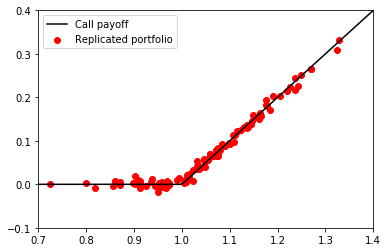

In [15]:
W[0] = call_price(S[0], K, 84/252, r, sigma)
x=np.linspace(0.7, 1.4, 100)

plt.figure()
plt.xlim(0.7, 1.4)
plt.ylim(-0.1, 0.4)
plt.plot(x,np.maximum(x-K,0), color='k', label='Call payoff') # payoff graph


for i in range(100):
    for t in range(0, total_date): # 84 영업일 이후를 의미
        Z = np.random.randn(1)
        S[t+1] = S[t]*np.exp((mu-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
        ttm = (84-t)/252 # time to maturity 84/252
        delta[t+1] = call_delta(S[t+1], K, ttm, r, sigma)
        C[t+1] = call_price(S[t+1], K, ttm, r, sigma)
        
        dZ = np.sqrt(1*dt)*Z # Brownian Motion
        dW = r*W[t]*dt + delta[t]*S[t]*((mu-r)*dt + sigma * dZ) # dynamics of Replicated Portfolio
        
        W[t+1] = W[t] + dW # rough dynamic equation

    plt.scatter(S[-1],W[-1], color='r') # Portfolio payoff at Maturity
    if i == 99:
         plt.scatter(S[-1],W[-1], color='r', label='Replicated portfolio')

#     plt.pause(0.1)
plt.legend()

# Appendix

## Dynamic Programming and the Hamilton-Jacobi-Bellman Equation

다음 형태의 optimal control problem을 상정해보자

$$\max_{u}{E[L(X(T))]}$$
s.t.
$$dX = a(t, X, u)dt + b(t, X, u)dZ$$

Dynamic programming approach를 써서, 현재 상태에서 최적의 "보상"을 확보한 value function $V(t,x)$를 정의함으로써 이 문제를 해결할 수 있다.  

$$V(t,x) = \max_{u}{E[L(X(T))|X(t)=x]}$$

그러면 iterated expectations의 성질과 Ito's lemma로 인해, $V(t,x)$는 다음을 만족한다.

$$
\begin{align}
V(t,x) & = \max_{u}{E[V(t+dt, X(t+dt)) \space\space| X(t) = x]}\\ 
& = \max_{u}{E[V(t, X(t)) + dV(t, X(t)) \space\space| X(t) = x]}\\
& = \max_{u}{E[V(t, X(t)) + V_tdt + V_X adt + \frac{1}{2}V_{XX}b^2 dt + V_X bdZ \space\space | X(t) = x]}\\
& = \max_{u}{[V(t, X(t)) + V_tdt + V_X adt + \frac{1}{2}V_{XX}b^2 dt]}\\
\end{align}
$$

그러므로,
$$0 = \max_{u}{[V(t, X(t)) + V_X a(t, X, u) + \frac{1}{2}V_{XX}b^2(t, X, u)]}$$